### Leptospirosis in Brazil

Exploring yearly data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data is split in two .csv files, the first for 2001-2006, and the second for 2007-2020

# Filenames
lepto1 = "data/A074451189_28_143_208.csv"
lepto2 = "data/A072804189_28_143_208.csv"

# Load data
lepto1 = pd.read_csv(lepto1, sep=";", 
                     encoding="latin-1",
                     skiprows=3, skipfooter=13,
                     na_values="-")

lepto2 = pd.read_csv(lepto2, sep=";", 
                     encoding="latin-1",
                     skiprows=3, skipfooter=10,
                     na_values="-")

# Get rid of useless columns
lepto1 = lepto1.drop(columns="Total")
lepto2 = lepto2.drop(lepto2.iloc[:, 1:25], axis = 1).drop(columns="Total")

# Rename municipality column for convenience
new_name = {"Município de residência": "COD_MUNRES"}

lepto1 = lepto1.rename(columns=new_name)
lepto2 = lepto2.rename(columns=new_name)

lepto1

C:\Users\bcarvalho\Miniconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,COD_MUNRES,2001,2002,2003,2004,2005,2006
0,110070 Campo Novo de Rondônia,NaN,1.0,NaN,NaN,NaN,NaN
1,110090 Castanheiras,NaN,NaN,NaN,NaN,NaN,1.0
2,110110 Itapuã do Oeste,NaN,1.0,NaN,NaN,NaN,NaN
3,110012 Ji-Paraná,NaN,NaN,NaN,NaN,1.0,NaN
4,110013 Machadinho D'Oeste,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...
1713,522045 Senador Canedo,NaN,NaN,2.0,NaN,NaN,NaN
1714,522140 Trindade,NaN,NaN,1.0,NaN,NaN,NaN
1715,522160 Uruaçu,NaN,NaN,NaN,NaN,NaN,1.0
1716,522185 Valparaíso de Goiás,2.0,NaN,NaN,2.0,1.0,1.0


In [3]:
# get geocodes as index
lepto1["CODMUN6"] = lepto1["COD_MUNRES"].str.slice(start=0, stop=6)
lepto2["CODMUN6"] = lepto2["COD_MUNRES"].str.slice(start=0, stop=6)

# merge files
lepto = lepto1.merge(lepto2, on="CODMUN6", how="outer")
lepto = lepto.drop(columns=["COD_MUNRES_x","COD_MUNRES_y"])

lepto

,2001,2002,2003,2004,2005,2006,CODMUN6,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,1.0,NaN,NaN,NaN,NaN,110070,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,110090,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,110110,NaN,1.0,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,110012,NaN,NaN,1.0,...,1.0,2.0,1.0,1.0,3.0,NaN,1.0,4.0,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,1.0,110013,NaN,1.0,3.0,...,NaN,1.0,17.0,24.0,12.0,7.0,NaN,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,NaN,NaN,NaN,NaN,NaN,NaN,522000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3230,NaN,NaN,NaN,NaN,NaN,NaN,522005,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3231,NaN,NaN,NaN,NaN,NaN,NaN,522010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3232,NaN,NaN,NaN,NaN,NaN,NaN,522060,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
# Get yearly totals
years = list(range(2001, 2018))
totals = []

for year in years:
    totals.append(lepto[str(year)].sum())

# rebuild df for plotting
yearly_lepto = pd.DataFrame(zip(years, totals), columns =['year', 'lepto'])
yearly_lepto.head()

,year,lepto
0,2001,3708.0
1,2002,2769.0
2,2003,3005.0
3,2004,3096.0
4,2005,3534.0


<AxesSubplot:xlabel='year', ylabel='Total number of lepto cases'>

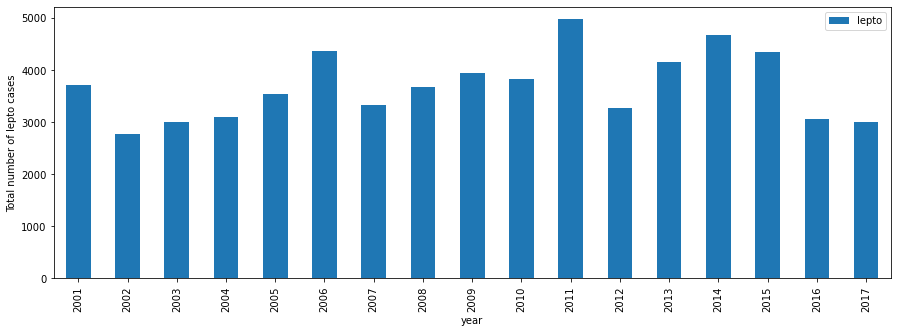

In [5]:
# plot

yearly_lepto.plot(kind="bar",y="lepto", x="year",
                 figsize=(15,5), ylabel="Total number of lepto cases")